In [1]:
import torch
import torch.utils.data
import torchvision
from glob import glob
import json
import os
from pathlib import Path, PurePath
import random
from PIL import Image
from zipfile import ZipFile
import torchvision.transforms as transforms

import numpy as np

In [2]:
config = json.load(open(os.path.expanduser("~/.thesis.conf")))
db_folder = Path(config['datasets']) / Path("washington/") 
db_folder.mkdir(exist_ok=True)
os.chdir(str(db_folder))

In [10]:
class Washington(torch.utils.data.Dataset):
    name = '20 pages of George Washington\'s manuscripts'
    homepage = 'http://ciir.cs.umass.edu/downloads/old/data_sets.html'
    link = 'http://ciir.cs.umass.edu/downloads/old/gw_20p_wannot.tgz'
    
    def __init__(self, path, transform=None, download=True, train=True, gt=False):
        imgfolder = Path('gw_20p_wannot')
        self.paths = glob(str(imgfolder / '*.tif'))
        self.boxes = glob(str(imgfolder / '*.txt'))
        self.paths.sort()
        self.boxes.sort()

    def __len__(self):
        return len(self.paths) 
    
    def loadimage(self,index):
        imgpath = self.paths[index]
        img =  Image.open(imgpath)
        return img
    
    def __getitem__(self, index):
        assert index < len(self)
        
        return self.loadimage(index), self.textboxes(index)
    
    def textboxes(self, index):
        boxes = np.genfromtxt(self.boxes[index],skip_header=1)
        img = self.loadimage(index)
        return np.concatenate((
               np.round(boxes[:,0:2]*(img.width-1)+1),
               np.round(boxes[:,2:4]*(img.height-1)+1)),1).astype(np.int32)
    
    def show(self,index, crop=None):
        img, boxes = self[index]
        
        if crop:
            #TODO: cropped
            xpos, ypos, size =  crop
            box = (xpos,ypos,xpos+size,ypos+size)
        
        fig,ax = plt.subplots(1)
        ax.imshow(img,cmap='gray')
        
        for x1, x2, y1, y2 in boxes:
            rect = patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=1,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
        plt.show()
        
dataset = Washington(db_folder)
# dataset[0]

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from skimage.segmentation import mark_boundaries

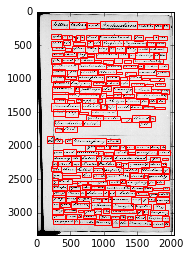

In [12]:
dataset.show(5)

In [14]:
%timeit dataset.loadimage(5)

100 loops, best of 3: 6.06 ms per loop
